In [ ]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
os.chdir("/content/drive/MyDrive/Works/Bitirme")

In [ ]:
data_file = "Data/Veriseti_Ortaokullar_GONDERILEN.xlsx"
data_original = pd.read_excel(data_file)
df = data_original.copy()
df = df.drop(columns=["okuladi", "okulno"])
df.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7
0,1,0,0,0,0,0,0,5,4,1,0,3,3,0,1,1,5,2,2,2,2,0,0,0,85.5956,88.0247,91.0988
1,1,0,0,0,0,0,0,2,4,1,0,2,3,0,1,3,3,3,2,2,2,0,0,1,96.3081,94.9244,97.2963
2,1,0,0,0,0,0,0,4,2,1,0,3,3,0,1,2,1,0,4,3,2,1,0,1,93.4270,91.3742,89.7531
3,1,0,0,0,0,0,0,2,4,1,0,4,4,0,1,4,3,3,1,4,4,1,1,1,64.5563,64.8812,61.3426
4,1,0,0,0,0,0,0,2,2,1,0,4,2,1,1,4,4,2,1,4,1,0,1,0,91.8089,93.9298,93.3457


In [ ]:
df.iloc[:, -3:] = df.iloc[:, -3:].astype("int64")

In [ ]:
def sifir_bir_duzelt(degisken):
  for i in df[degisken].index:
    if df[degisken][i] ==0:
      df[degisken][i] = 1
    elif df[degisken][i]==1:
      df[degisken][i]=0

In [ ]:
sifir_bir_duzelt("Asag")
sifir_bir_duzelt("Bsag")
sifir_bir_duzelt("Aoz")
sifir_bir_duzelt("Boz")
sifir_bir_duzelt("ABayri")
sifir_bir_duzelt("Abirlikte")
sifir_bir_duzelt("Acalisma")
sifir_bir_duzelt("Bcalisma")
sifir_bir_duzelt("oda")
sifir_bir_duzelt("hastalik")
sifir_bir_duzelt("okul_dyk")
sifir_bir_duzelt("ozel_kurs")

In [ ]:
df.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7
0,1,1,1,1,1,1,1,5,4,0,1,3,3,1,0,1,5,2,2,2,2,1,1,0,85,88,91
1,1,1,1,1,1,1,1,2,4,0,1,2,3,1,0,3,3,3,2,2,2,1,1,1,96,94,97
2,1,1,1,1,1,1,1,4,2,0,1,3,3,1,0,2,1,0,4,3,2,0,1,1,93,91,89
3,1,1,1,1,1,1,1,2,4,0,1,4,4,1,0,4,3,3,1,4,4,0,0,1,64,64,61
4,1,1,1,1,1,1,1,2,2,0,1,4,2,0,0,4,4,2,1,4,1,1,0,0,91,93,93


In [ ]:
x_reduced_col_names = df.corr().abs()["ort7"].nlargest(10).index
df[x_reduced_col_names].corr()

,ort7,ort6,ort5,ders_calisma,Bogrenim,Aogrenim,ozel_kurs,gelir,televizyon,cinsiyet
ort7,1.000000,0.909238,0.843153,0.374718,0.333300,0.320489,0.235556,0.225700,-0.154438,-0.153145
ort6,0.909238,1.000000,0.912723,0.364994,0.355567,0.347004,0.241577,0.272485,-0.175874,-0.144251
ort5,0.843153,0.912723,1.000000,0.327255,0.328829,0.306146,0.211915,0.248373,-0.158355,-0.144784
ders_calisma,0.374718,0.364994,0.327255,1.000000,0.169126,0.188828,0.248800,0.123214,-0.113449,-0.159408
Bogrenim,0.333300,0.355567,0.328829,0.169126,1.000000,0.471159,0.199666,0.400929,-0.119668,0.016816
Aogrenim,0.320489,0.347004,0.306146,0.188828,0.471159,1.000000,0.215348,0.362621,-0.127693,-0.013916
ozel_kurs,0.235556,0.241577,0.211915,0.248800,0.199666,0.215348,1.000000,0.225053,-0.078590,-0.040946
gelir,0.225700,0.272485,0.248373,0.123214,0.400929,0.362621,0.225053,1.000000,-0.073796,0.040543
televizyon,-0.154438,-0.175874,-0.158355,-0.113449,-0.119668,-0.127693,-0.078590,-0.073796,1.000000,0.027154
cinsiyet,-0.153145,-0.144251,-0.144784,-0.159408,0.016816,-0.013916,-0.040946,0.040543,0.027154,1.000000


In [ ]:
x = df[x_reduced_col_names]
x.dtypes

ort7            int64
ort6            int64
ort5            int64
ders_calisma    int64
Bogrenim        int64
Aogrenim        int64
ozel_kurs       int64
gelir           int64
televizyon      int64
cinsiyet        int64
dtype: object

In [ ]:
x.shape

(1180, 10)

In [ ]:
df_train = x.iloc[:1000, :]
df_test = x.iloc[1000:, :]

In [ ]:
x_train = df_train[df_train.columns.difference(['ort7'])].values
y_train = df_train[['ort7']].values
x_test = df_test[df_test.columns.difference(['ort7'])].values

In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()

x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.fit_transform(y_train)

In [ ]:
x_test

array([[ 0.6510374 ,  1.05177618, -0.93228691, ...,  0.72041874,
         1.61962601, -1.49210196],
       [ 0.6510374 ,  0.28517547, -0.93228691, ..., -0.0762109 ,
        -0.61742649, -1.49210196],
       [ 0.6510374 , -0.48142525, -0.93228691, ...,  0.0123035 ,
        -0.61742649,  0.74661066],
       ...,
       [-0.91207761, -0.48142525, -0.93228691, ...,  1.42853398,
        -0.61742649, -1.49210196],
       [ 0.6510374 , -0.48142525,  1.07263117, ...,  0.89744755,
        -0.61742649, -1.49210196],
       [ 0.6510374 ,  0.28517547,  1.07263117, ...,  0.72041874,
        -0.61742649,  0.74661066]])

In [ ]:
#train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=42)

In [ ]:
x_train

array([[ 1.4325949 ,  0.28517547,  1.07263117, ...,  0.54338993,
         1.61962601, -0.37274565],
       [-0.91207761,  0.28517547,  1.07263117, ...,  1.07447636,
         1.61962601,  0.74661066],
       [ 0.6510374 , -1.24802596,  1.07263117, ...,  0.80893315,
         1.61962601, -2.61145827],
       ...,
       [ 2.21415241,  1.81837689, -0.93228691, ...,  1.42853398,
        -0.61742649, -0.37274565],
       [ 0.6510374 , -0.48142525, -0.93228691, ...,  0.80893315,
         1.61962601, -1.49210196],
       [-0.1305201 , -1.24802596, -0.93228691, ..., -0.16472531,
        -0.61742649,  0.74661066]])

In [ ]:
model = Sequential()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, activation='relu', input_shape=(9, )))
model.add(tf.keras.layers.Dense(8, activation= 'relu'))
model.add(tf.keras.layers.Dense(16, activation= 'relu'))
model.add(tf.keras.layers.Dense(32, activation= 'relu'))
model.add(tf.keras.layers.Dense(128, activation= 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error', metrics=["mse"])
history = model.fit(x_train,y_train, validation_split=0.03, batch_size=64, epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 14ms/step - loss: 0.8576 - mse: 0.8576 - val_loss: 0.9196 - val_mse: 0.9196
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5804 - mse: 0.5804 - val_loss: 0.6231 - val_mse: 0.6231
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4370 - mse: 0.4370 - val_loss: 0.5192 - val_mse: 0.5192
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4117 - mse: 0.4117 - val_loss: 0.5311 - val_mse: 0.5311
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4535 - mse: 0.4535 - val_loss: 0.4984 - val_mse: 0.4984
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3775 - mse: 0.3775 - val_loss: 0.4838 - val_mse: 0.4838
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3144 - mse: 0.3144 - val_loss: 0.4628 - val_mse: 0.4628
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3145 - 

loss = 0.18671321868896484
val_loss = 0.13486747443675995


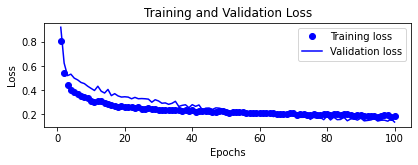

In [ ]:
def plot_acc_loss(x):  
  
  loss = x.history["loss"]
  val_loss = x.history["val_loss"]
 
  
  print("loss =", loss[-1])
  print("val_loss =", val_loss[-1])
  epochs = range(1, len(loss) + 1)
  fig = plt.figure()
  

  plt.subplot(2,1,2)
  plt.plot(epochs, loss, "bo", label="Training loss")
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  fig.tight_layout()
  plt.show()
  
  

plot_acc_loss(history)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred = sc_y.inverse_transform(y_pred)

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.rename(columns={0: "tahminler"})

In [ ]:
y_pred = y_pred.astype("int64")

In [ ]:
labels = df_test.ort7

In [ ]:
df_preds = pd.DataFrame(y_pred[:10])
df_preds

,tahminler
0,92
1,82
2,82
3,75
4,90
5,86
6,92
7,70
8,80
9,81


In [ ]:

df_labels = pd.DataFrame(labels[:10])
df_labels = df_labels.rename(columns={0: "gerçek notlar"})
df_labels = df_labels.reset_index()
df_labels = df_labels.iloc[:, -1:]
df_labels

,ort7
0,95
1,86
2,87
3,80
4,86
5,86
6,96
7,66
8,88
9,89


In [ ]:
df_tahminler = pd.concat([df_preds, df_labels.reindex(df_preds.index)], axis=1)

In [ ]:
df_tahminler

,tahminler,ort7
0,92,95
1,82,86
2,82,87
3,75,80
4,90,86
5,86,86
6,92,96
7,70,66
8,80,88
9,81,89
